**A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.**

**They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market.**

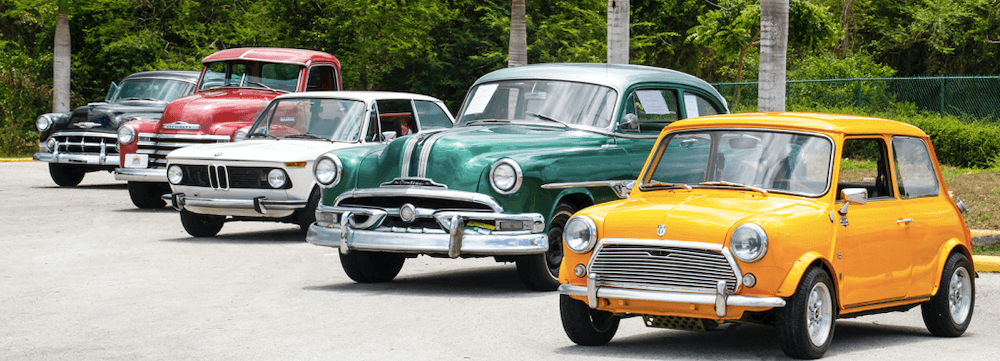

***The company wants to know:***

*Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.*

In [1231]:
import pandas as pd                 #import all the packages that required
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1232]:
data=pd.read_csv('auto_imports.csv',names=['symboling','normalized-losses','car name','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price'])
# Read the csv file and assign the dataframe a name

# 1. Basic Checks & Domain Analysis

In [1233]:
pd.set_option('display.max_columns',None) # it representing all the columns in the df

In [1234]:
data.head() # it shows 5rows of the df

,symboling,normalized-losses,car name,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [1235]:
data.shape  #it shows how many rows and columns are there in the dataset

(201, 26)

In [1236]:
data.info()    #it gives the information about the datatype,and nulllvalue of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   car name           201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [1237]:
data.describe()  #it gives the statistical information about the numerical features of the dataset

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [1238]:
data.describe(include=['O'])    #it gives the statistical information about the catogorical features of the dataset

,normalized-losses,car name,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
count,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201
unique,52,22,2,2,3,5,3,2,6,7,8,39,37,59,23
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500
freq,37,32,181,165,113,94,118,198,145,157,92,23,19,19,36


In [1239]:
data=data.replace('?',np.nan)  # i found some nan value in the form of '?', so i replace it with nan values

In [1240]:
data.head()

,symboling,normalized-losses,car name,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [1241]:
data['fuel-system'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [1242]:
data.loc[data.duplicated()] #Checking for duplicate values

,symboling,normalized-losses,car name,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


# Information about dataset

***We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.***



1. **Symboling:-** Symboling corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale.


2. **Normalized-losses:-** It is the relative average loss payment per insured vehicle year. This value is nor- malized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc.), and represents the average loss per car per year.


3. **Car Name:-** It represents the car belongs which manufacturer.


4. **Fuel-type:-** A fuel type is a fuel that is used to provide power to the motor in motor vehicles.


5. **Aspiration:-** On which platform the engine is built.
   Types:- 1. std- An internal combustion (IC) engine where the intake of air depends on the atmospheric pressure.
           2. turbo- An engine that uses the turbine-driven forced induction method to power the vehicle.


6. **Num-of-doors:-** Number of doors the car have.


7. **Body-style:-** Body style is the easiest way to categorize a vehicle, That how it looks and which type of car it is.


8. **Drive-wheels:-** It gives the information about the car drive on which set of wheels.
   Types:- 1.rwd- RWD means that the power from the engine is delivered to the rear wheels and the rear wheels push the car                   forward. 
           2.fwd- Front wheel drive (FWD) means that the power from the engine is delivered to the front wheels.
           3.4wd- A 4×4 truck or car, likewise called 4×4 (4WD) or 4-by-4, indicates a system in which an automobile's
                  egine powers all 4 wheels evenly.
                  
                  
9. **Engine-location:-** The engine is located under the front or the back hood of the vehicle.


10. **Wheel-base:-** The wheelbase of any vehicle is the distance between the centre of the front wheels and the centre of the rear wheels.


11. **Length:-** Different vehicles of different makes will be of varying lengths. The average midsize sedan will be within the 14-foot range


12. **Width:-** According to VEHQ, the average width of a car is 5.8 feet. Vehicle widths usually vary due to aerodynamic performance or added safety features.


14. **Height:-** The vehicle height measures the vertical distance between the ground and the highest point of the vehicle, when the vehicle is stationary on a level ground.


15. **Curb-weight:-** Curb weight is the weight of the vehicle including a full tank of fuel and all standard equipment.


16. **Engine-type:-** It defines on which architecture the car was built.
    Types- 1.dohc- Dual overhead cam engines are found in most modern vehicles today. They allow better airflow with less                      obstruction and are generally much more efficient engines than OHV or SOHC engines
           2.ohcv-An overhead valve (OHV) engine is a piston engine whose valves are located in the cylinder head above the                   combustion chamber.
           3.ohc- An overhead camshaft (OHC) engine is a piston engine where the camshaft is located in the cylinder head                     above the combustion chamber.
           4.l- Engines are measured by displacement, usually expressed in liters (L) or cubic centimeters (cc).
           5.rotor-A rotary engine is a type of internal combustion engine that's been used to power all kinds of vehicles,                    from cars and trucks to boats and planes.
           6.ohcf- In a OHCF engine the camshaft is installed in the cylinder head, and valves are operated either by the                      rocker arms or directly through the lifters.
           
           
17. **Num-of-cylinders:-**  It contains a piston that moves up and down, compressing the fuel, which ignites and causes      combustion. There are two valves at the top of the cylinder.


18. **Engine-size:-** Engine size is the volume of fuel and air that can be pushed through a car's cylinders and is measured in cubic centimetres (cc).


19. **Fuel-system:-** The fuel system is made up of the fuel tank, pump, filter, and injectors or carburetor, and is responsible for delivering fuel to the engine as needed.


20. **Bore:-** Bore is the inner diameter of the cylinder. The volume at bottom dead centre (VBDC) is defined as the volume occupied between the cylinder head and the piston face when the piston is farthest from the cylinder head.


21. **Stroke:-** A phase of the engine's cycle (e.g. compression stroke, exhaust stroke), during which the piston travels from top to bottom or vice versa.


22. **Compression-ratio:-** The compression ratio (CR) is defined as the ratio of the volume of the cylinder and its head space (including the pre-combustion chamber, if present) when the piston is at the bottom of its stroke to the volume of the head space when the piston is at the top of its travel.


23. **Horsepower:-** Horsepower refers to the power an engine produces. It's calculated through the power needed to move 550 pounds one foot in one second or by the power needs to move 33,000 pounds one foot in one minute.


24. **Peak-rpm:-** Car engine rpm increases as you press the accelerator, as does power — at least to a point. An engine doesn't necessarily produce its maximum power at its highest rpm.


25. **City-mpg:-** The score a car will get on average in city conditions, with stopping and starting at lower speeds.


26. **Highway-mpg:-** City mpg generally is the lowest mpg rating for a vehicle primarily because of the frequent starting, stopping and idling. Highway mpg typically is the highest because uninterrupted driving tends to burn less fuel.


27. **Price:-** Finally price is out target feature. It depends upon the features mentioned all above.

# 2. Data Visualization & Ananlysis

### Univariate Analysis

In [1243]:
data.columns

Index(['symboling', 'normalized-losses', 'car name', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [1244]:
data.head()

,symboling,normalized-losses,car name,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


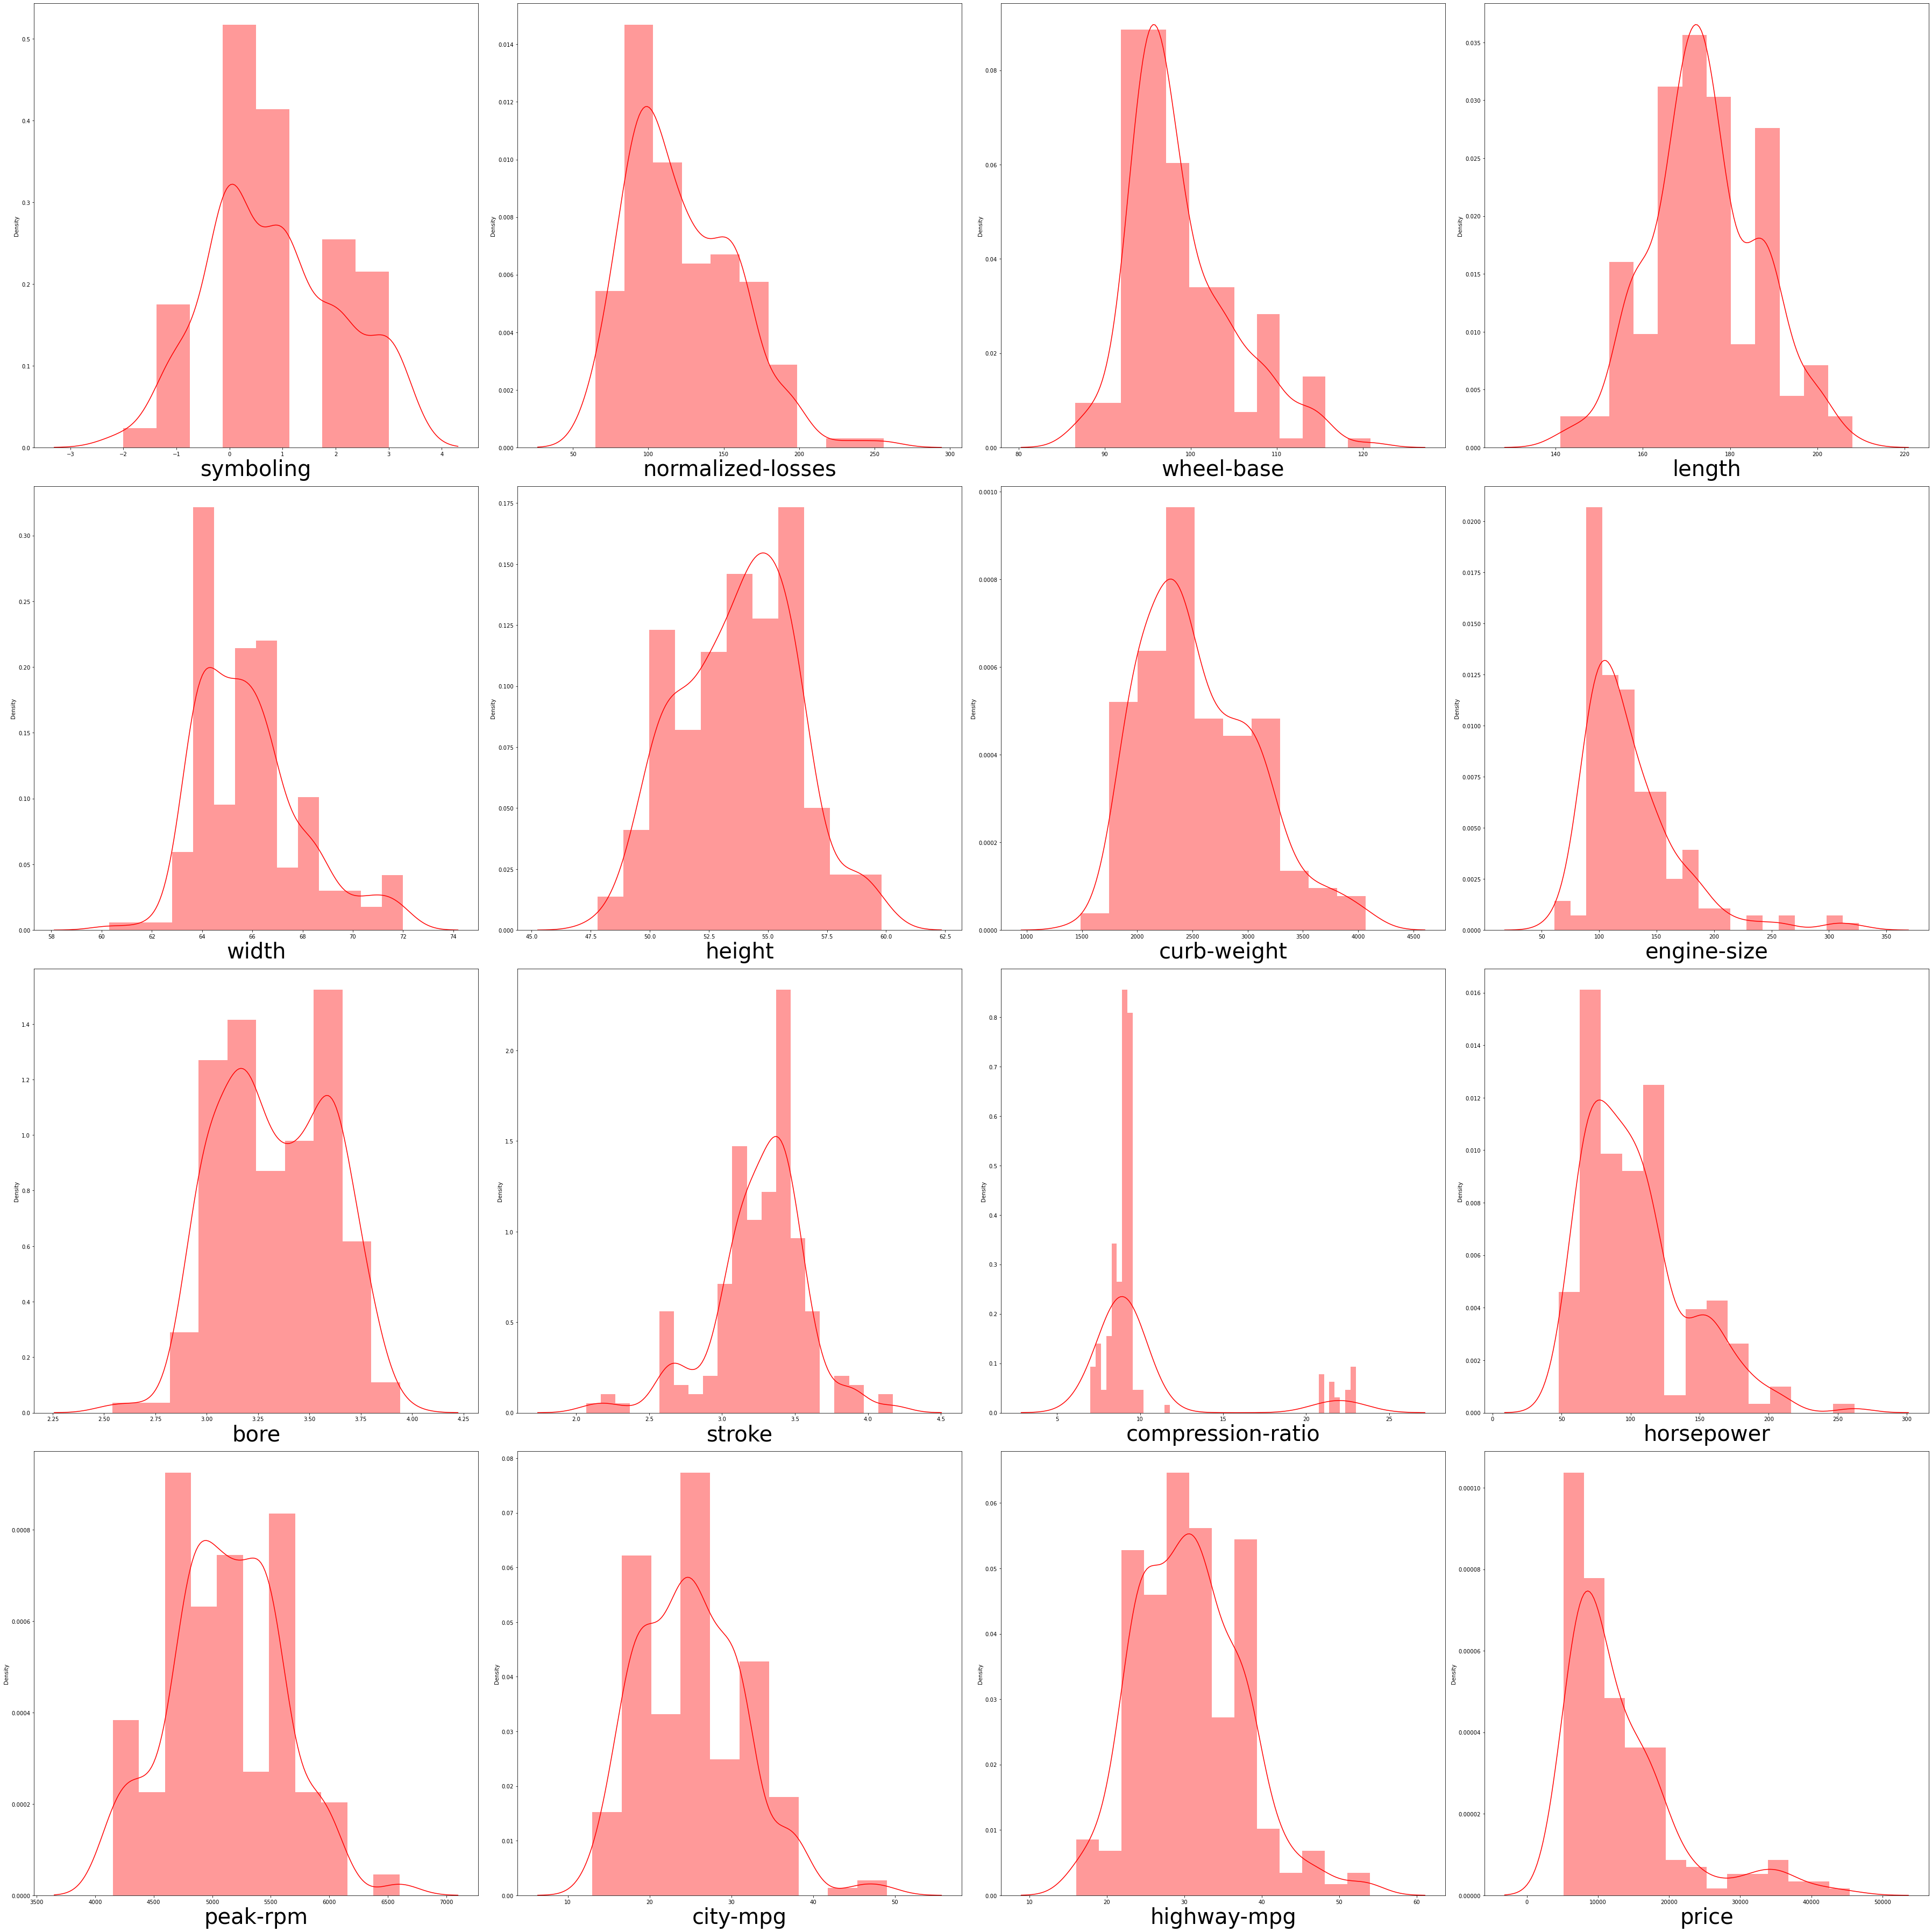

In [1245]:
plt.figure(figsize=(50,50))                                     #plotting distibution plot for numerical features in the dataset
data1=data[['symboling', 'normalized-losses',                   #It show the feature of the dataset how much skewed
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 
        'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price']]
plot=1

for column in data1:
    if plot<=16:
        ax=plt.subplot(4,4,plot)
        sns.distplot(data1[column].dropna(axis=0),color='r')
        plt.xlabel(column,fontsize=40)
    plot+=1
plt.tight_layout()

## Insights

1. It seems symboling, normalized-losses, wheel-base, width, curb-weight, engine-size, horsepower, city-mpg and price skewed towards right.
2. But stroke and height are slightly skewed towards left.
3. Apart from the above feature others features like length, bore, compression-ratio, peak-rpm, highway-mpg are sperd accross the data.But these features are not perfect normal distribution.

## Visualization for categorical features

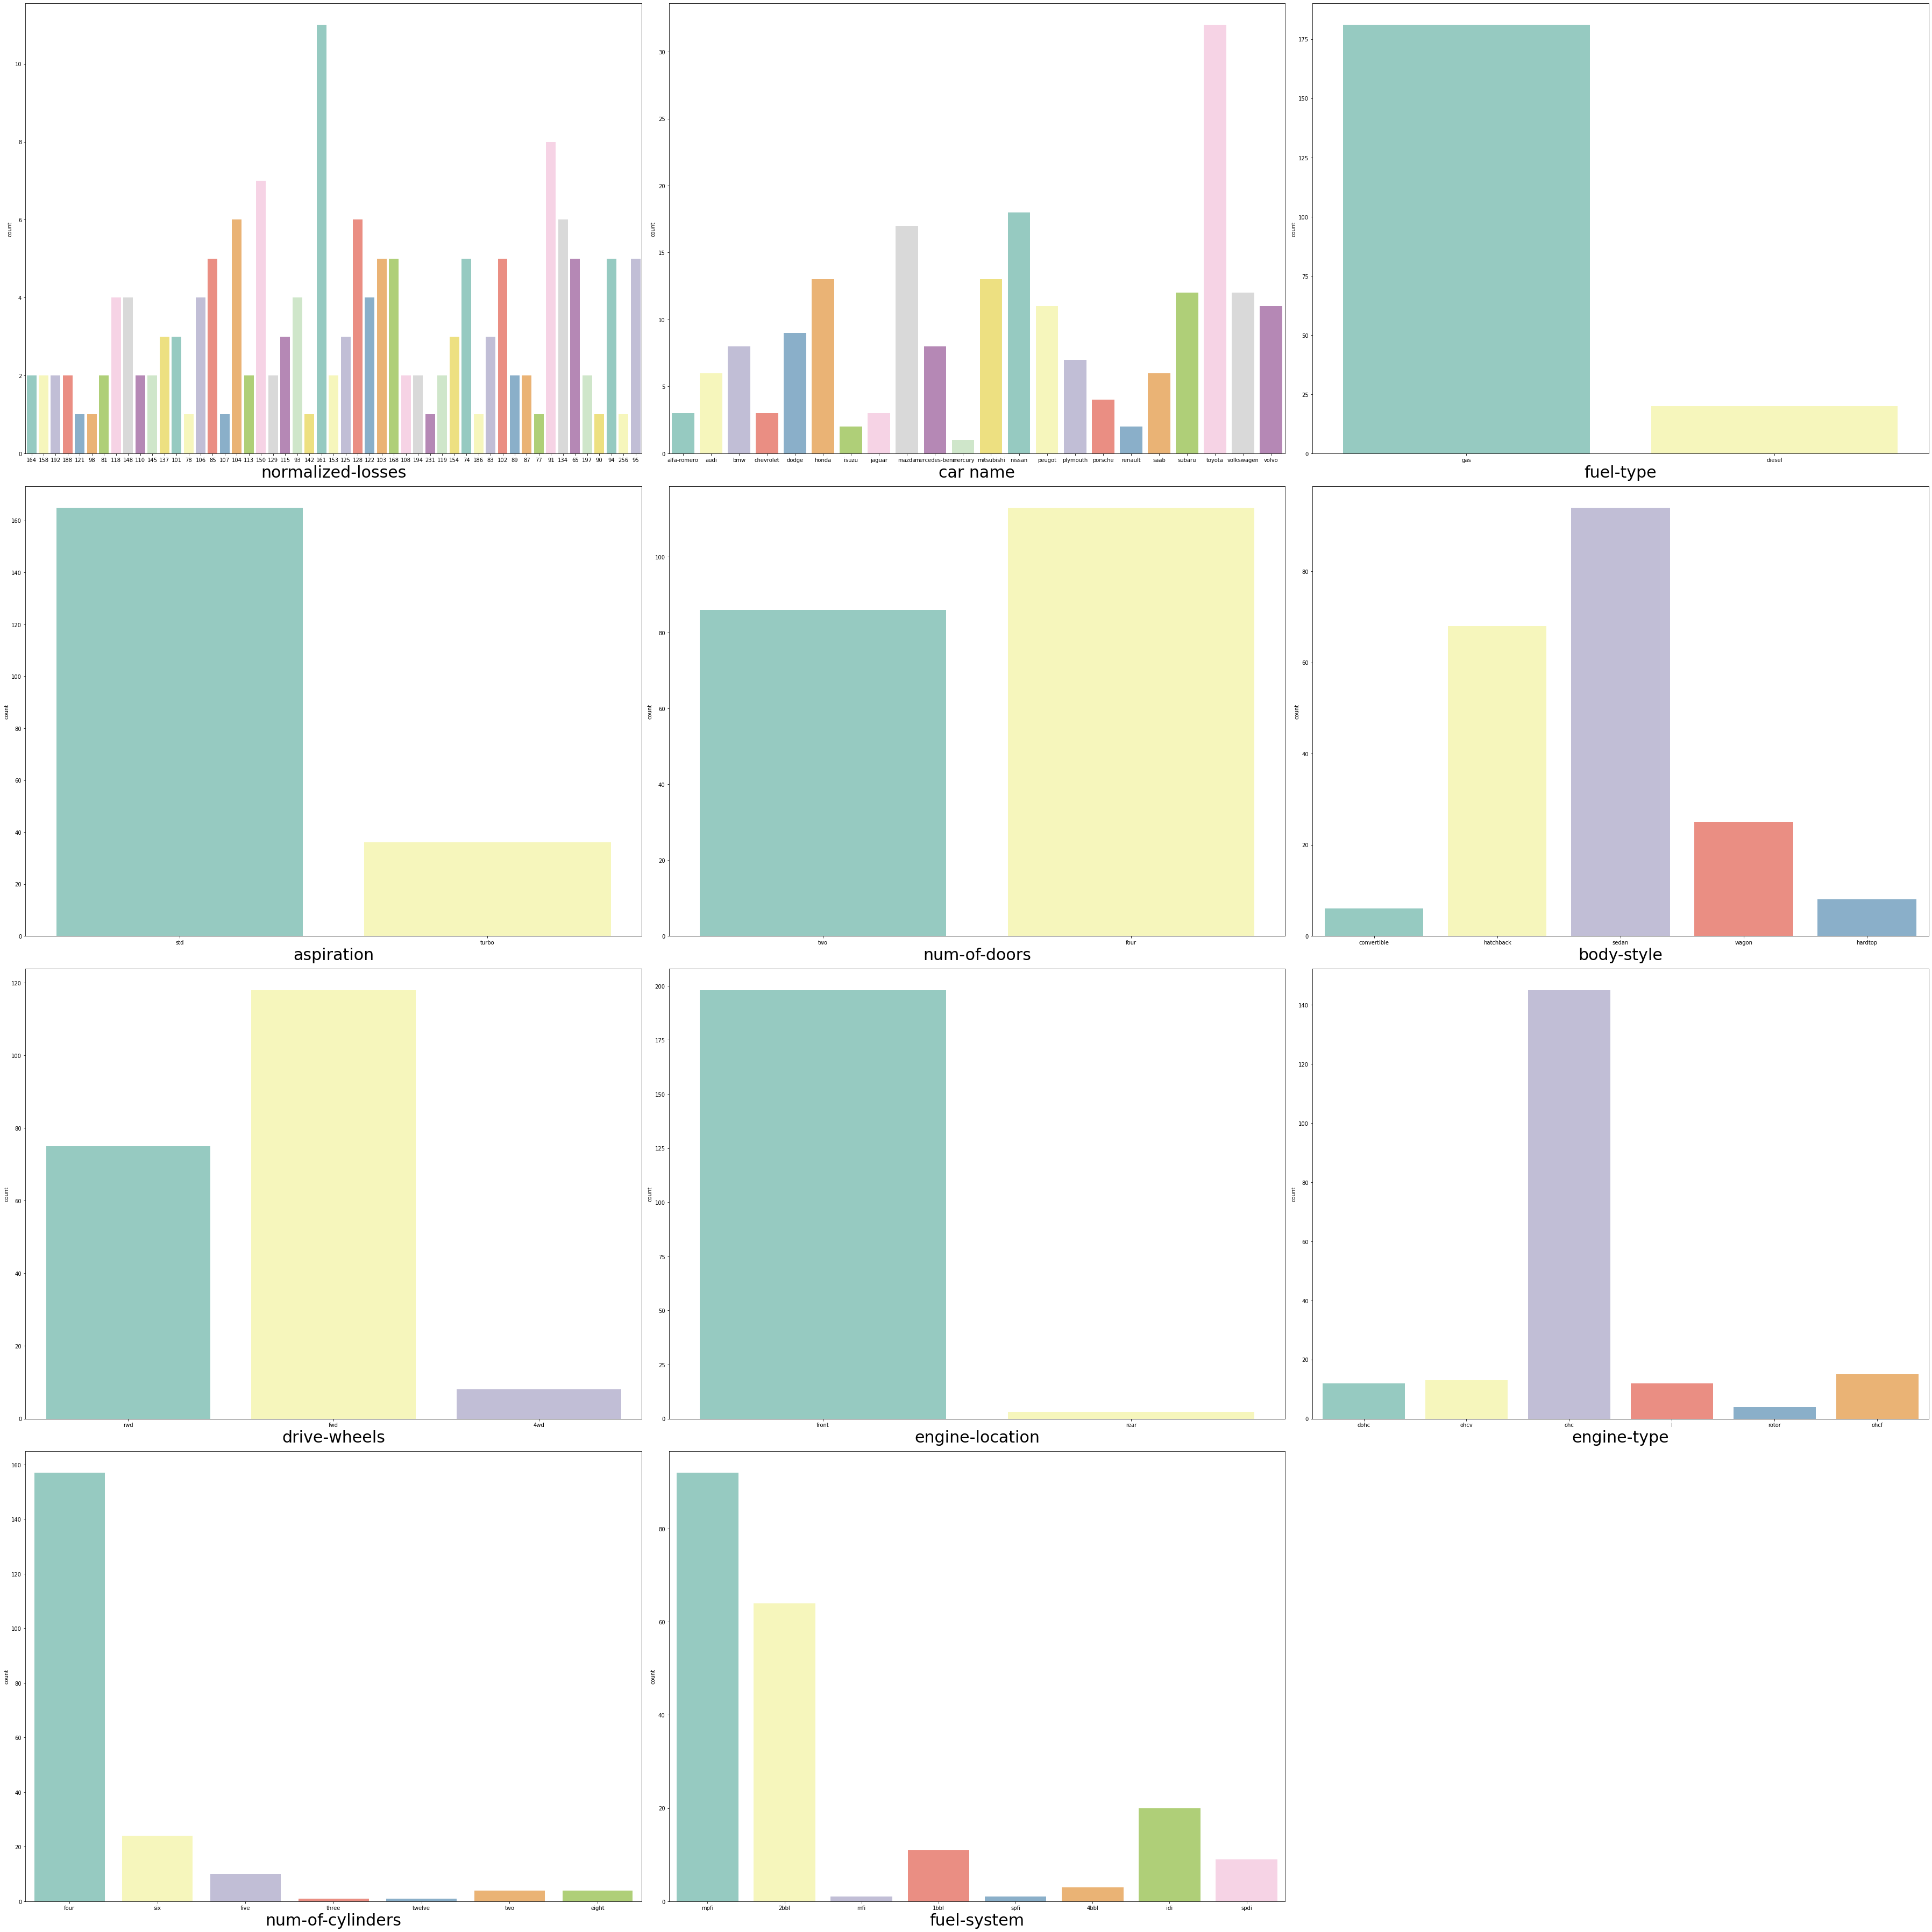

In [1246]:
plt.figure(figsize=(50,50))
data3=data[['normalized-losses','car name','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']]
plot=1
for column in data3:               # I am using count plot here to check no of counts of different attributes in different catogorical features
    if plot<=12:
        ax=plt.subplot(4,3,plot)
        sns.countplot(x=data3[column].dropna(axis=0),palette="Set3")
        plt.xlabel(column,fontsize=30)
    plot+=1
plt.tight_layout()

## Insights

1. There are more cars of gas fuel type than diesel.
2. Same as the case with aspiration, more car of std than turbo.
3. People prefer fore doors rather than two doors.
4. In the case of drive-wheels there are more cars of fwd than others.
5. Most of the cars have front engine.
6. All other features like normalized-losses, car name, body-style, engine-type, num-of-cylinders, fuel-system are spread accross the range but not evenly.

In [1247]:
data['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

# Biveriate Analysis

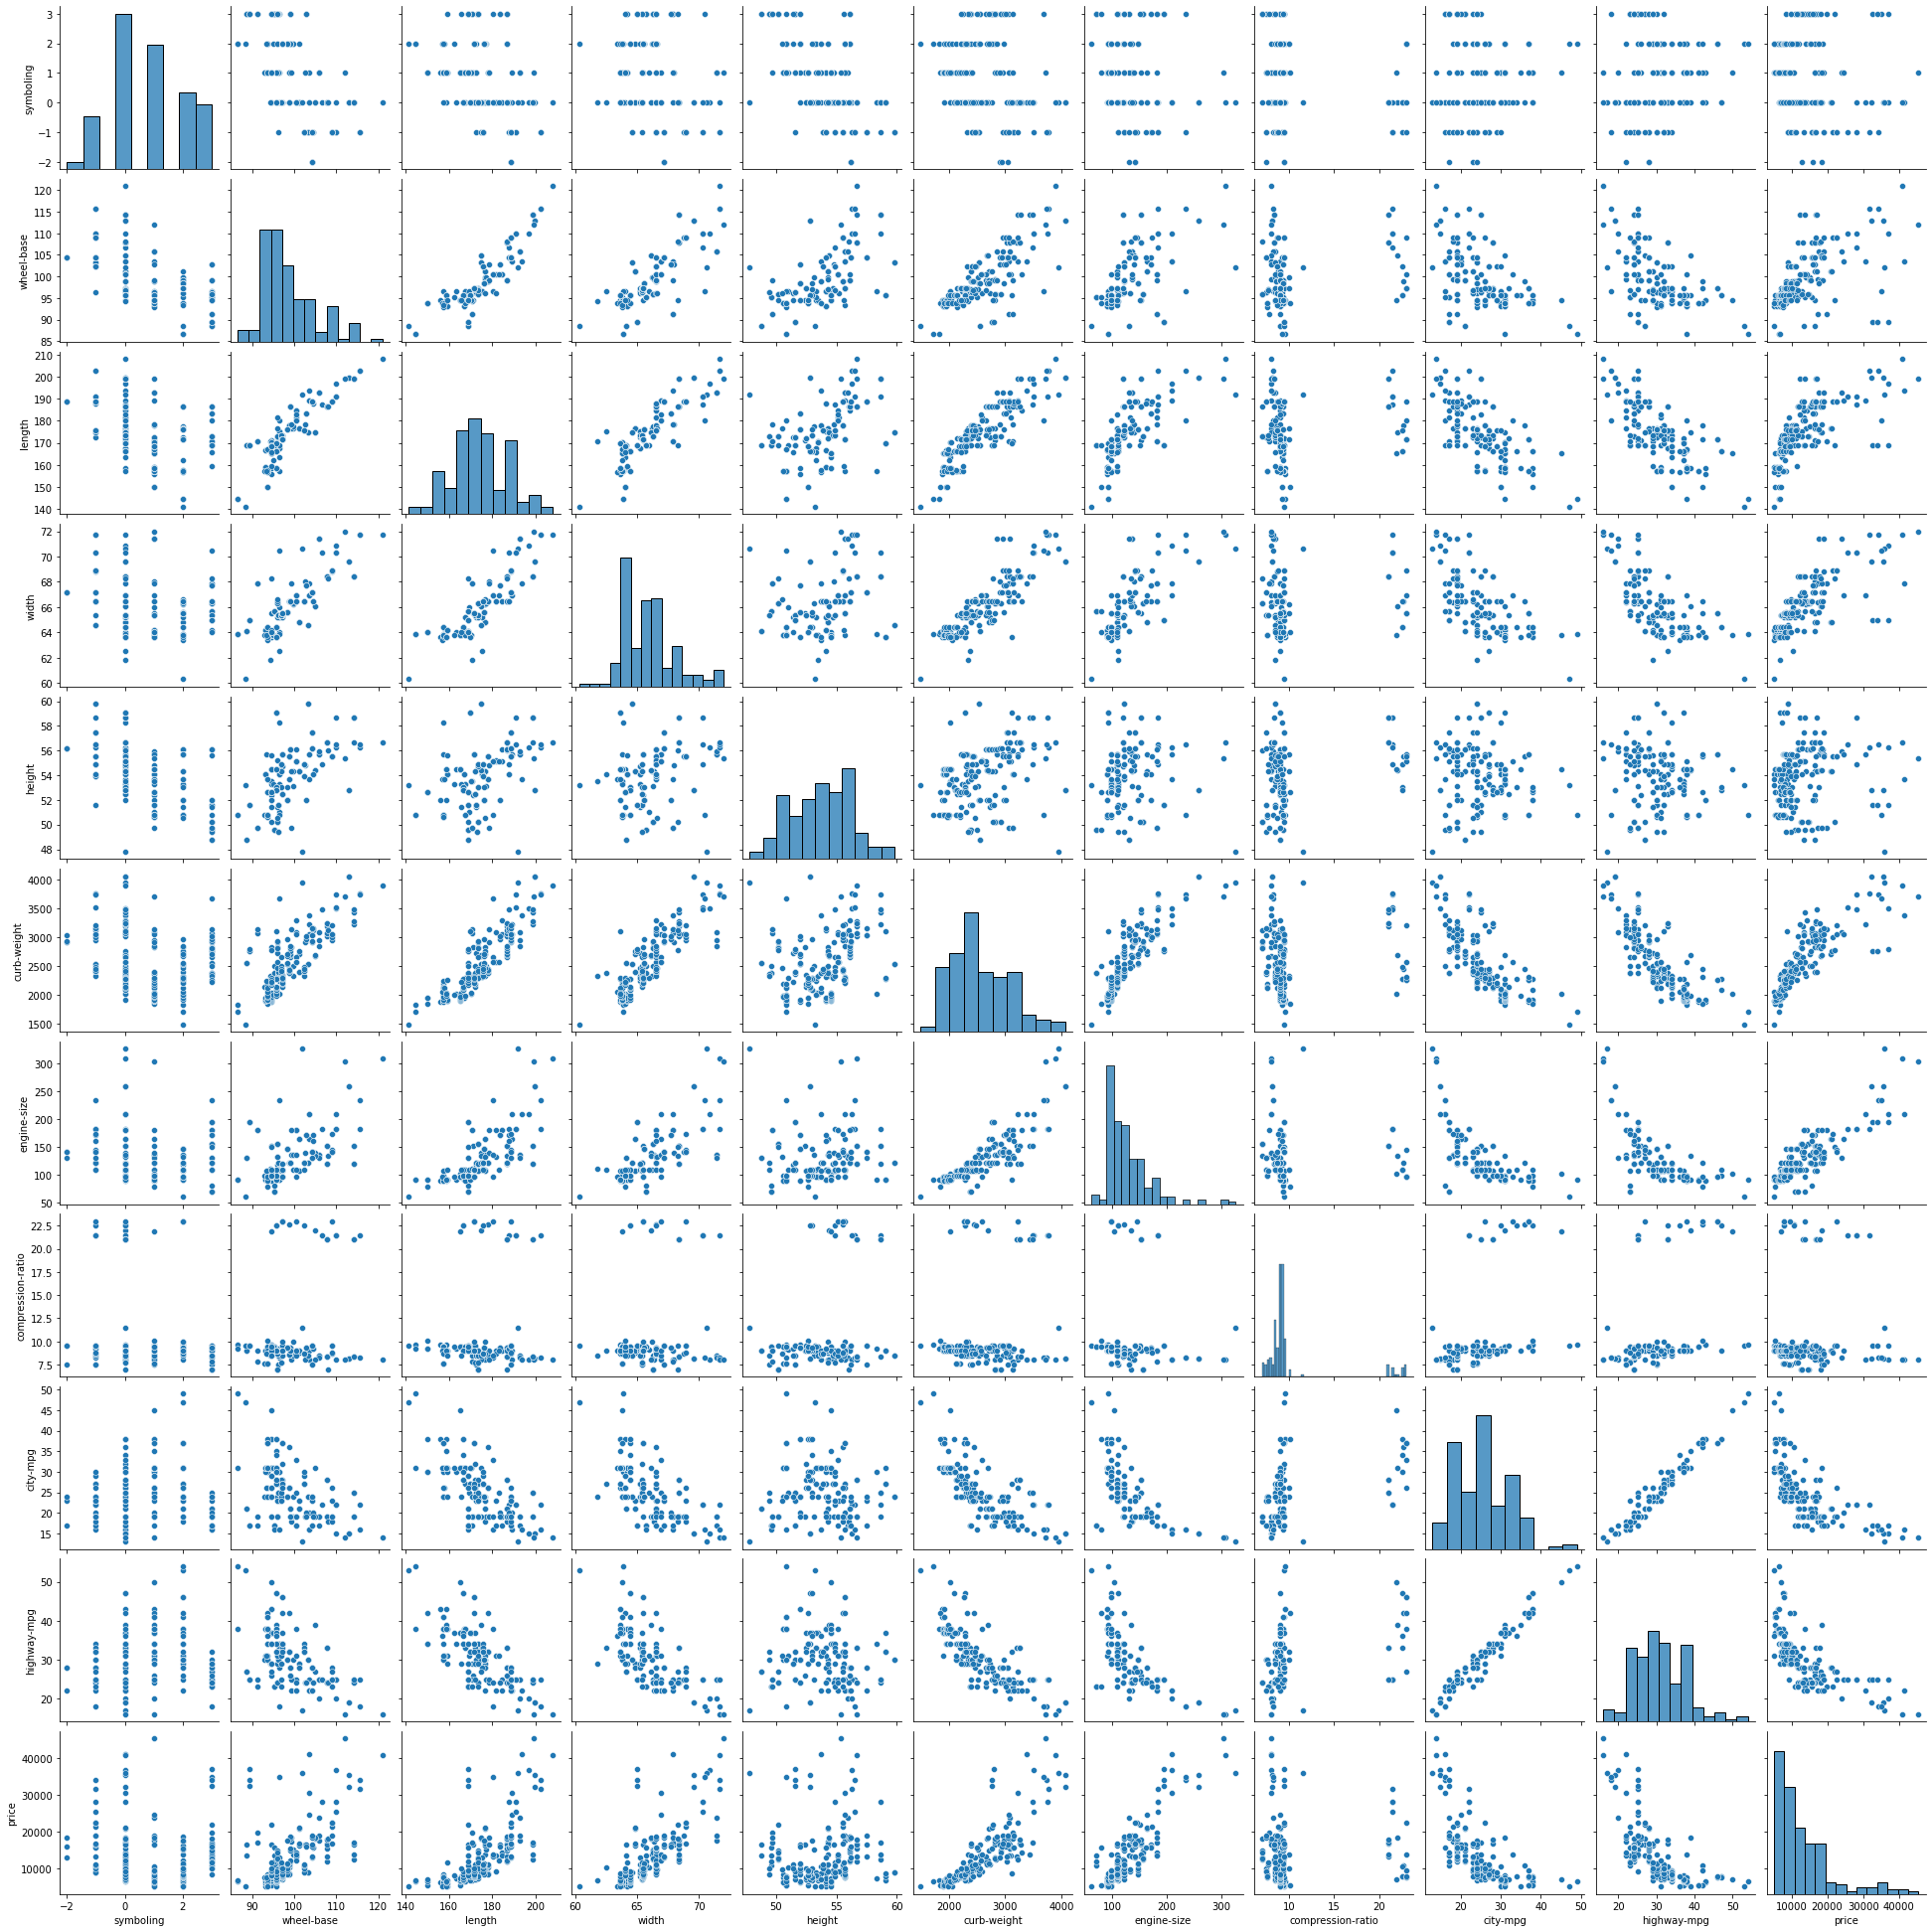

In [1248]:
sns.pairplot(data1)  #Here i am using pairplot for better visualization and relation between target variable with the other features.

# Insights:-

1. As per the above plot we can easily infer that the features like wheel-base, length, width, curb-weight, engine-size are highly corelated with price.

2. And features like city-mpg, highway-mpg are negatively corelated with price.
3. Apart from the above feature like symboling, normalized-losses, height, height, bore, stroke, compression-ratio, horsepower, peak-rpm don't have any relation with price at all.


# Biveriate analysis for categorical features

In [1249]:
data.head()

,symboling,normalized-losses,car name,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


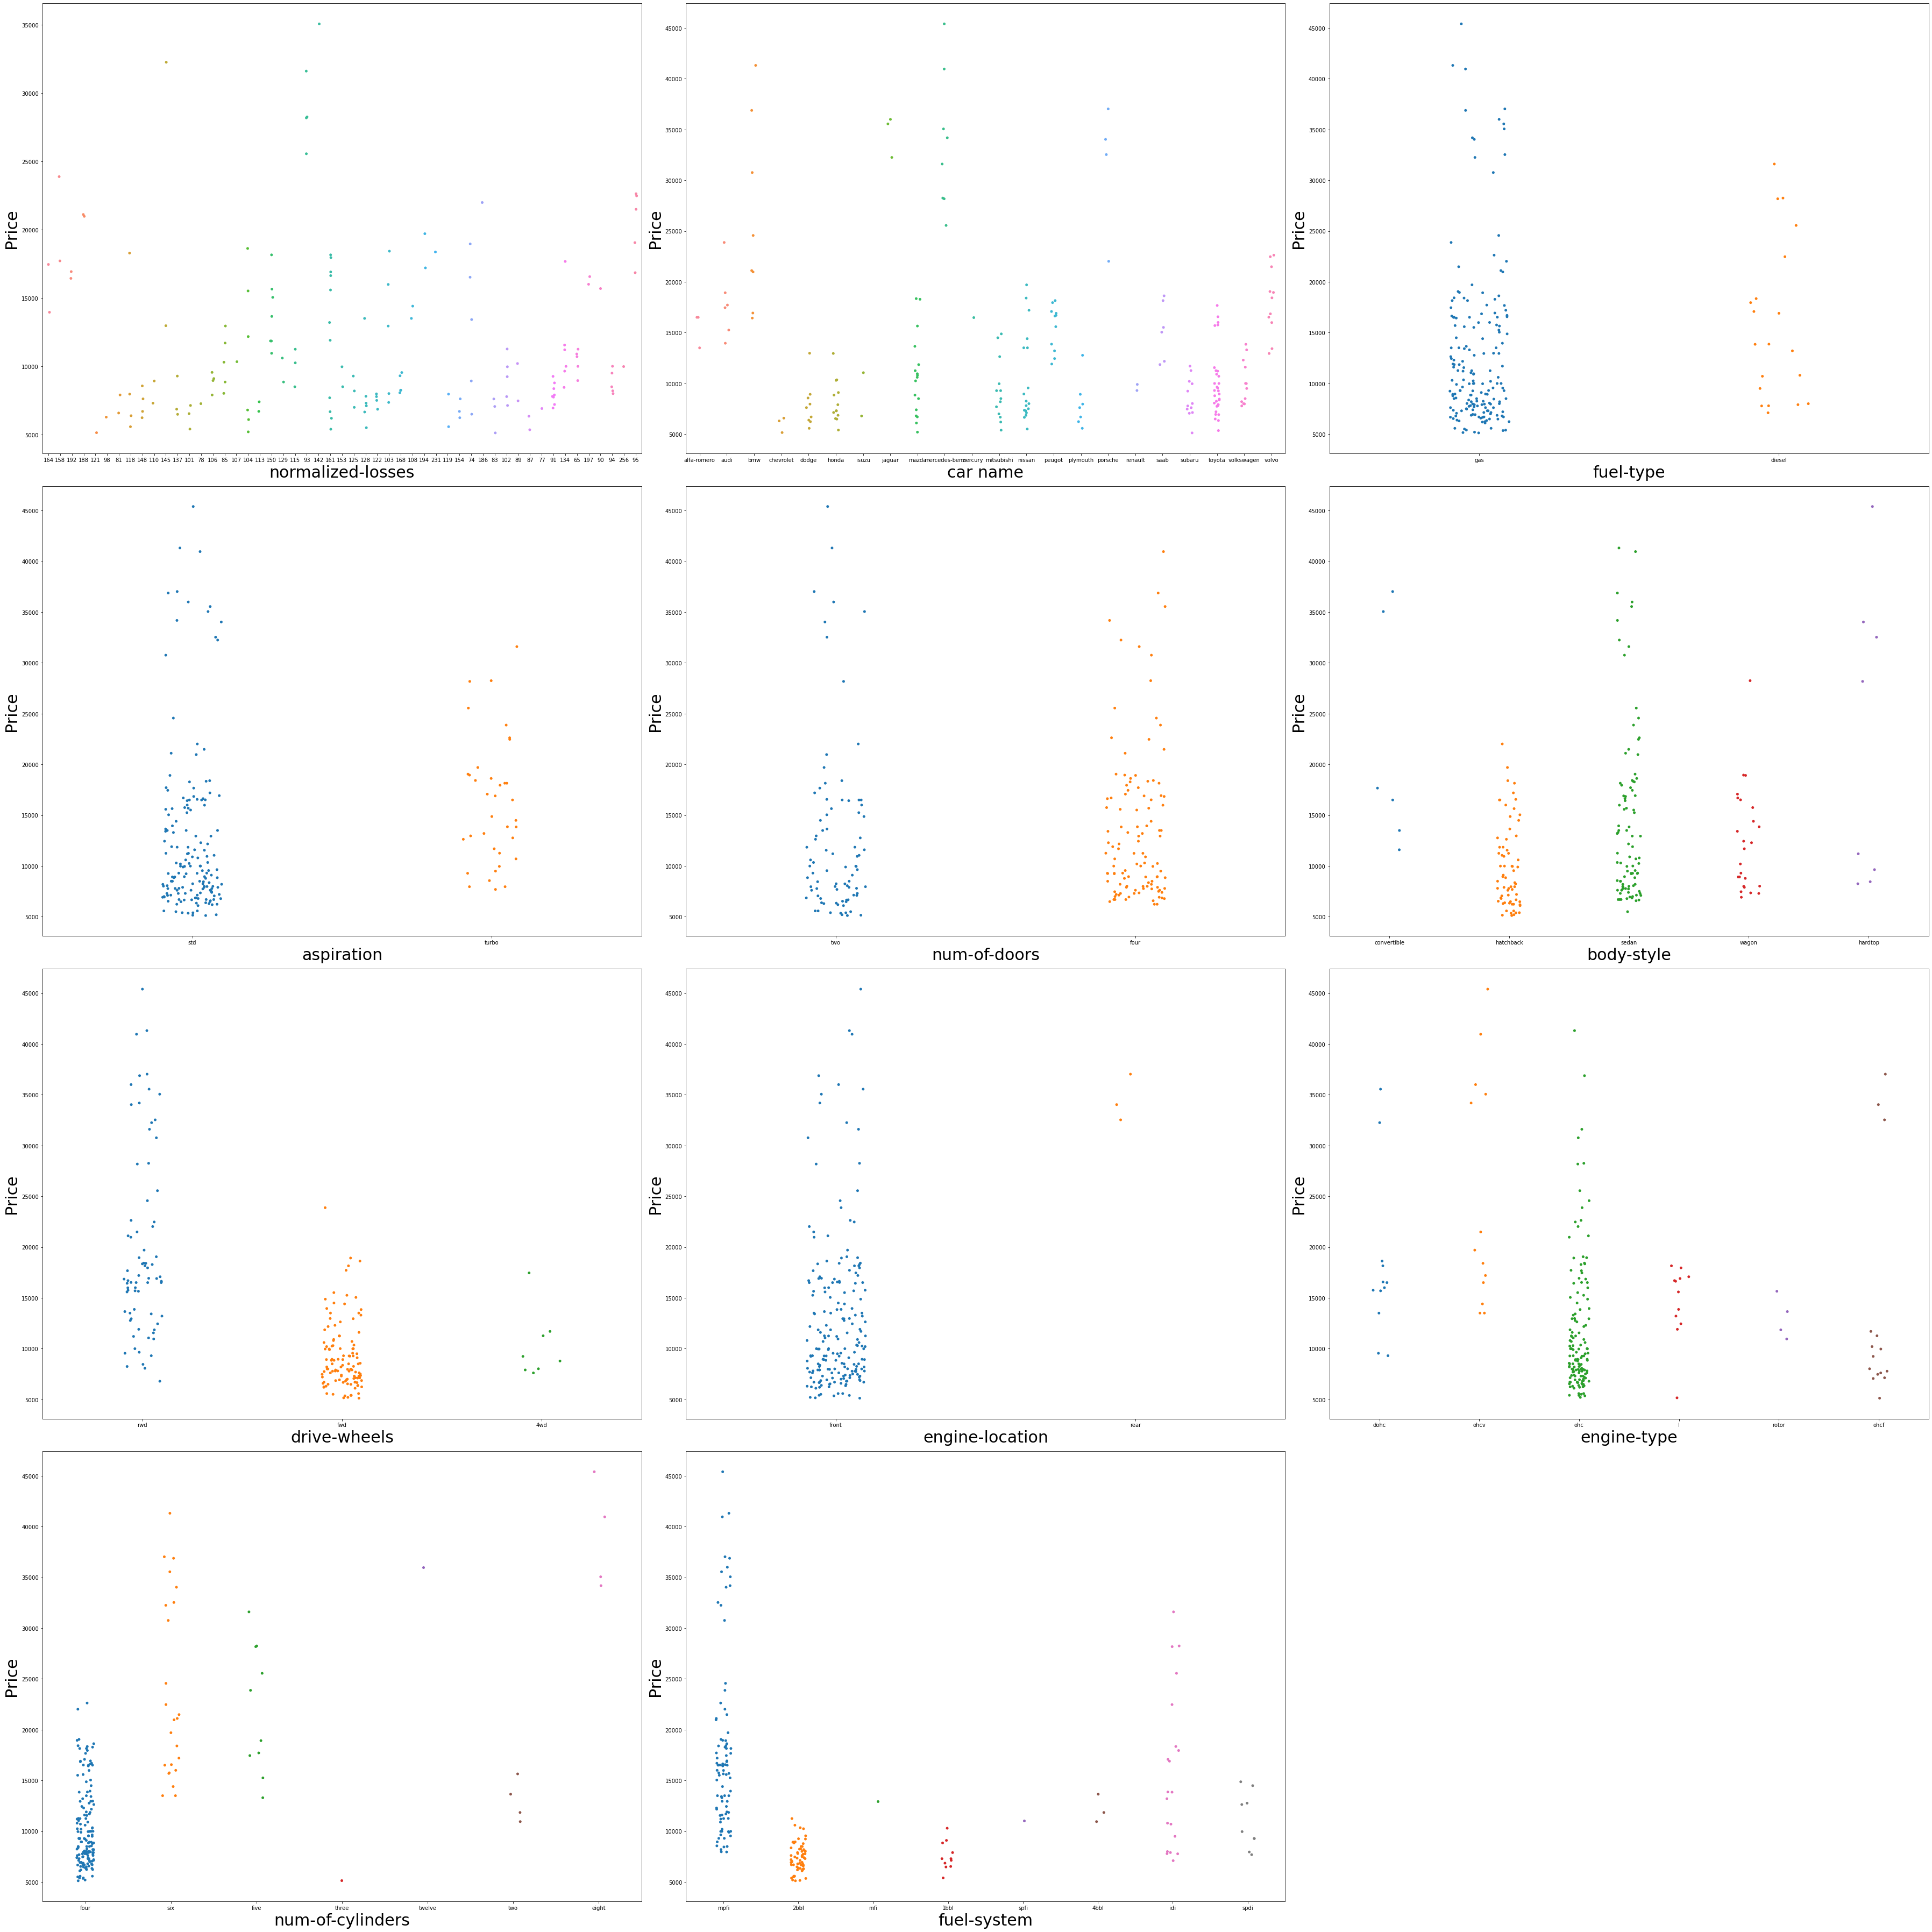

In [1250]:
plt.figure(figsize=(50,50))
data3=data[['normalized-losses','car name','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']]
plot=1
for column in data3:               # I am using strip plot here to check relationship between catogorical feature and price.
    if plot<=12:
        ax=plt.subplot(4,3,plot)
        sns.stripplot(x=data3[column].dropna(axis=0),y=data['price'])
        plt.xlabel(column,fontsize=30)
        plt.ylabel('Price',fontsize=30)
    plot+=1
plt.tight_layout()

# Insights
1. Gas car,std car, fwd car, front engine car, mpfi cars are more pricer than other.
2. And other features are spread accross price range but not evenly.

# 3. Data Pre-processing/Feature Engineering

### Handling misssing values

In [1251]:
data.drop(['normalized-losses','car name'],inplace=True,axis=1)  #As we found using visualization these feature has no effect on price thats why i dropped these features 

In [1252]:
data.head()

,symboling,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [1253]:
data.isnull().sum()  # isnull function is used to find missing values in the dataset

symboling            0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### num-of-doors

In [1254]:
data['num-of-doors'].unique()     #Unique function is gives the unique value in feature

array(['two', 'four', nan], dtype=object)

In [1255]:
data['num-of-doors'].mode()

0    four
dtype: object

In [1256]:
data['num-of-doors']=data['num-of-doors'].fillna('four')    #Fillna function fills the missing values in the place of NaN values.
# Here i am using mode function because the feature is categorical feature

### bore

In [1257]:
data['bore'].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.50', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.60', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', nan, '3.39', '3.76', '3.58', '3.46', '3.80',
       '3.78', '3.17', '3.35', '3.59', '2.99', '3.33', '3.70', '3.61',
       '3.94', '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'],
      dtype=object)

In [1258]:
data['bore']=data['bore'].fillna(data['bore'].median())   #Here i am using median because it is a continious variable feature

### stroke

In [1259]:
data['stroke'].unique()

array(['2.68', '3.47', '3.40', '2.80', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.90', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', nan, '3.16', '3.64', '3.10', '3.35', '3.12', '3.86',
       '3.29', '3.27', '3.52', '2.19', '3.21', '2.90', '2.07', '2.36',
       '2.64', '3.08', '3.50', '3.54', '2.87'], dtype=object)

In [1260]:
data['stroke']=data['stroke'].fillna(data['stroke'].median())

### horsepower

In [1261]:
data['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '101', '121', '182',
       '48', '70', '68', '88', '145', '58', '76', '60', '86', '100', '78',
       '90', '176', '262', '135', '84', '64', '120', '72', '123', '155',
       '184', '175', '116', '69', '55', '97', '152', '160', '200', '95',
       '142', '143', '207', nan, '73', '82', '94', '62', '56', '112',
       '92', '161', '156', '52', '85', '114', '162', '134', '106'],
      dtype=object)

In [1262]:
data['horsepower']=data['horsepower'].fillna(data['horsepower'].median())

### peak-rpm

In [1263]:
data['peak-rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', nan, '5250', '4900', '4400', '6600', '5300'], dtype=object)

In [1264]:
data['peak-rpm']=data['peak-rpm'].fillna(data['peak-rpm'].median())

In [1265]:
data.isnull().sum()

symboling            0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# Converting Datatype

In [1266]:
data['bore']=data['bore'].astype('float')
data['stroke']=data['stroke'].astype('float')
data['horsepower']=data['horsepower'].astype('float')
data['peak-rpm']=data['peak-rpm'].astype('float')

# Convert categorical feature to numerical feature

In [1267]:
data['fuel-economy']=(0.55*data['city-mpg']+0.45*data['highway-mpg'])


#Combined fuel economy is a weighted average of City and Highway MPG values that is calculated by weighting the City value by 55% and the Highway value by 45%.

In [1268]:
data.drop(['highway-mpg','city-mpg'],axis=1,inplace=True)  #Delete the extra column

In [1269]:
data.head()

,symboling,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,fuel-economy
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,13495,23.70
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,16500,23.70
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,16500,22.15
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,13950,26.70
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,17450,19.80


In [1270]:
def encode(column,dataset):                            # Here i have defined dummie function 
    df=pd.get_dummies(dataset[column],drop_first=True) #It helps to convert catogorical feature to numerical feature
    dataset=pd.concat([dataset,df],axis=1)
    dataset.drop(column,inplace=True,axis=1)
    return dataset

In [1271]:
data=encode('aspiration',data)

In [1272]:
data=encode('fuel-type',data)

In [1273]:
data=encode('body-style',data)

In [1274]:
data=encode('drive-wheels',data)

In [1275]:
data=encode('engine-type',data)

In [1276]:
data=encode('engine-location',data)

In [1277]:
data=encode('num-of-doors',data)

In [1278]:
data=encode('num-of-cylinders',data)

In [1279]:
data=encode('fuel-system',data)

In [1280]:
data.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,price,fuel-economy,turbo,gas,hardtop,hatchback,sedan,wagon,fwd,rwd,l,ohc,ohcf,ohcv,rotor,rear,two,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,13495,23.70,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,16500,23.70,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,16500,22.15,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,13950,26.70,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,17450,19.80,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [1281]:
data.shape

(201, 42)

# Handling Outliers

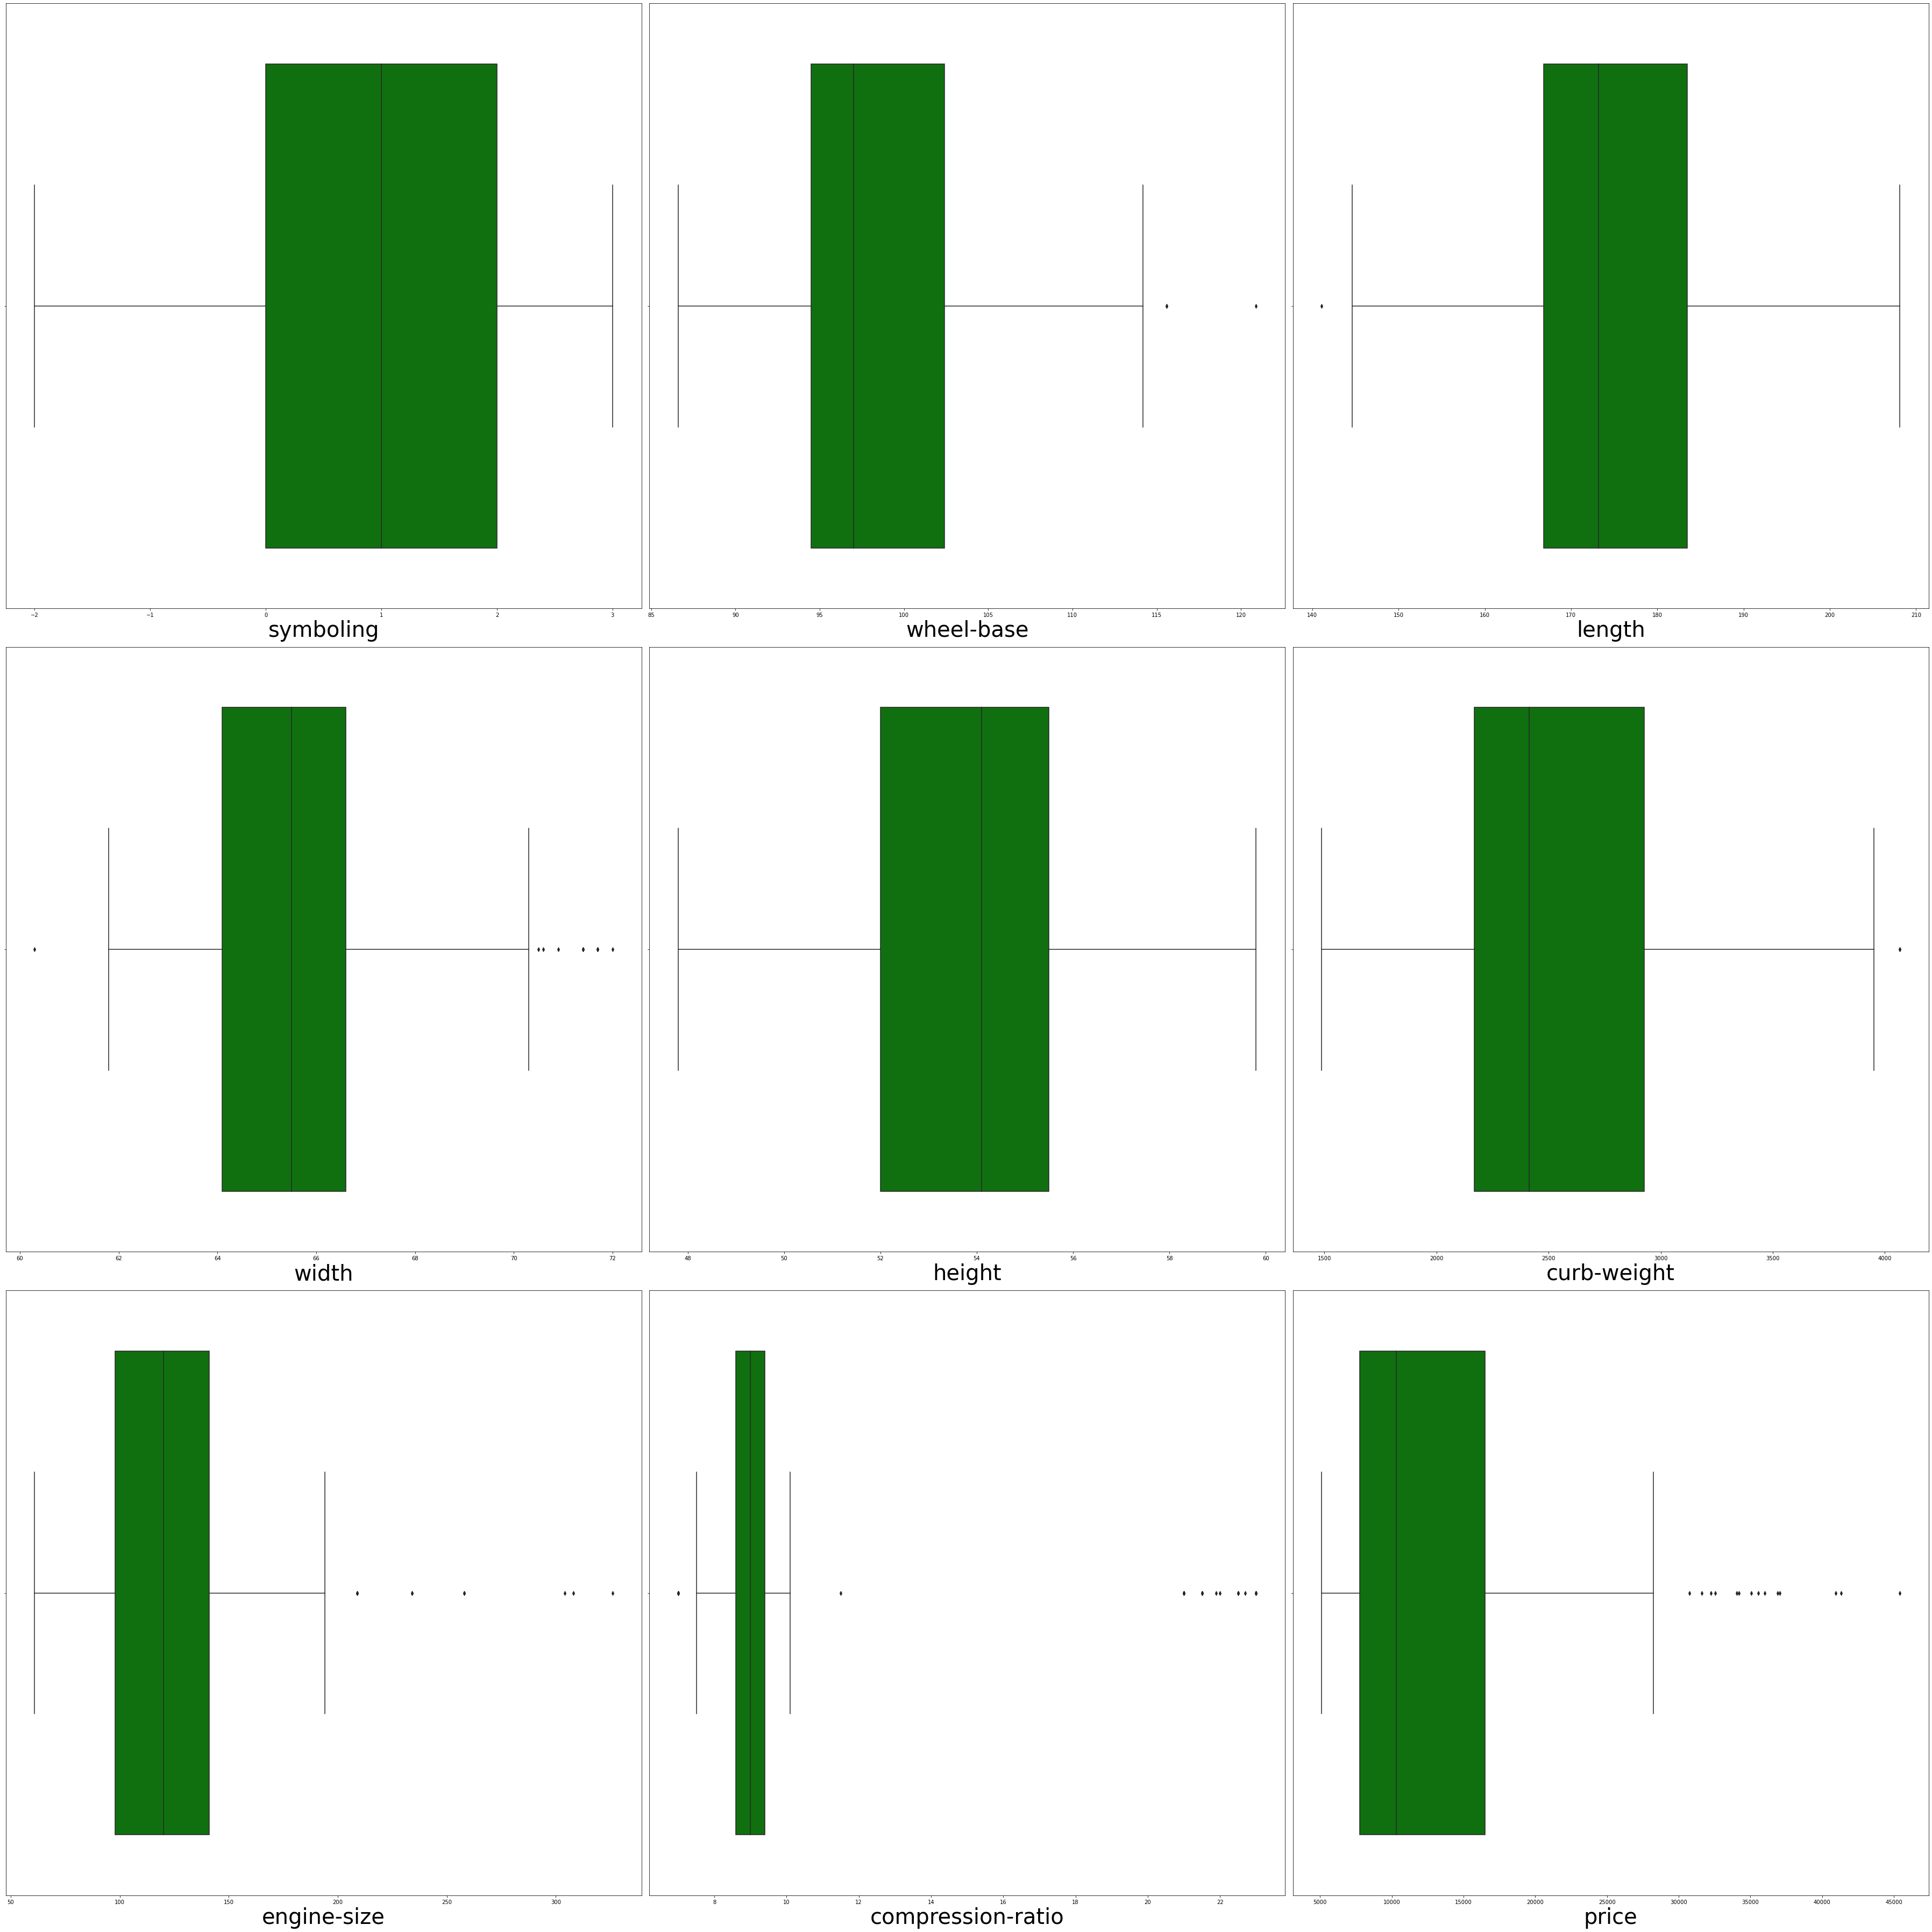

In [1282]:
plt.figure(figsize=(50,50))                  #Here i am creation function for checking outliers in the dataset
data4=data[['symboling',                     #And i am going to remove it so that it cant affect my ml model
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 
        'engine-size', 
       'compression-ratio', 
        'price']]
plot=1

for column in data4:
    if plot<=9:
        ax=plt.subplot(3,3,plot)
        sns.boxplot(data4[column].dropna(axis=0),color='g')
        plt.xlabel(column,fontsize=40)
    plot+=1
plt.tight_layout()

In [1283]:
from scipy import stats          # Creating a model top remove outliers
def outlier(column,dataset):
    iqr=stats.iqr(dataset[column],interpolation='midpoint')
    q1=dataset[column].quantile(0.25)
    min_range=q1-1.5*iqr
    q3=dataset[column].quantile(0.75)
    max_range=q3+1.5*iqr
    dataset.loc[dataset[column]<min_range,column]=np.median(dataset[column])
    dataset.loc[dataset[column]>max_range,column]=np.median(dataset[column])
    return dataset

In [1284]:
data=outlier('length',data)

In [1285]:
data=outlier('width',data)

In [1286]:
data=outlier('curb-weight',data)

In [1287]:
data=outlier('engine-size',data)

In [1288]:
data=outlier('compression-ratio',data)

In [1289]:
data=outlier('wheel-base',data)

In [1290]:
data=outlier('price',data)

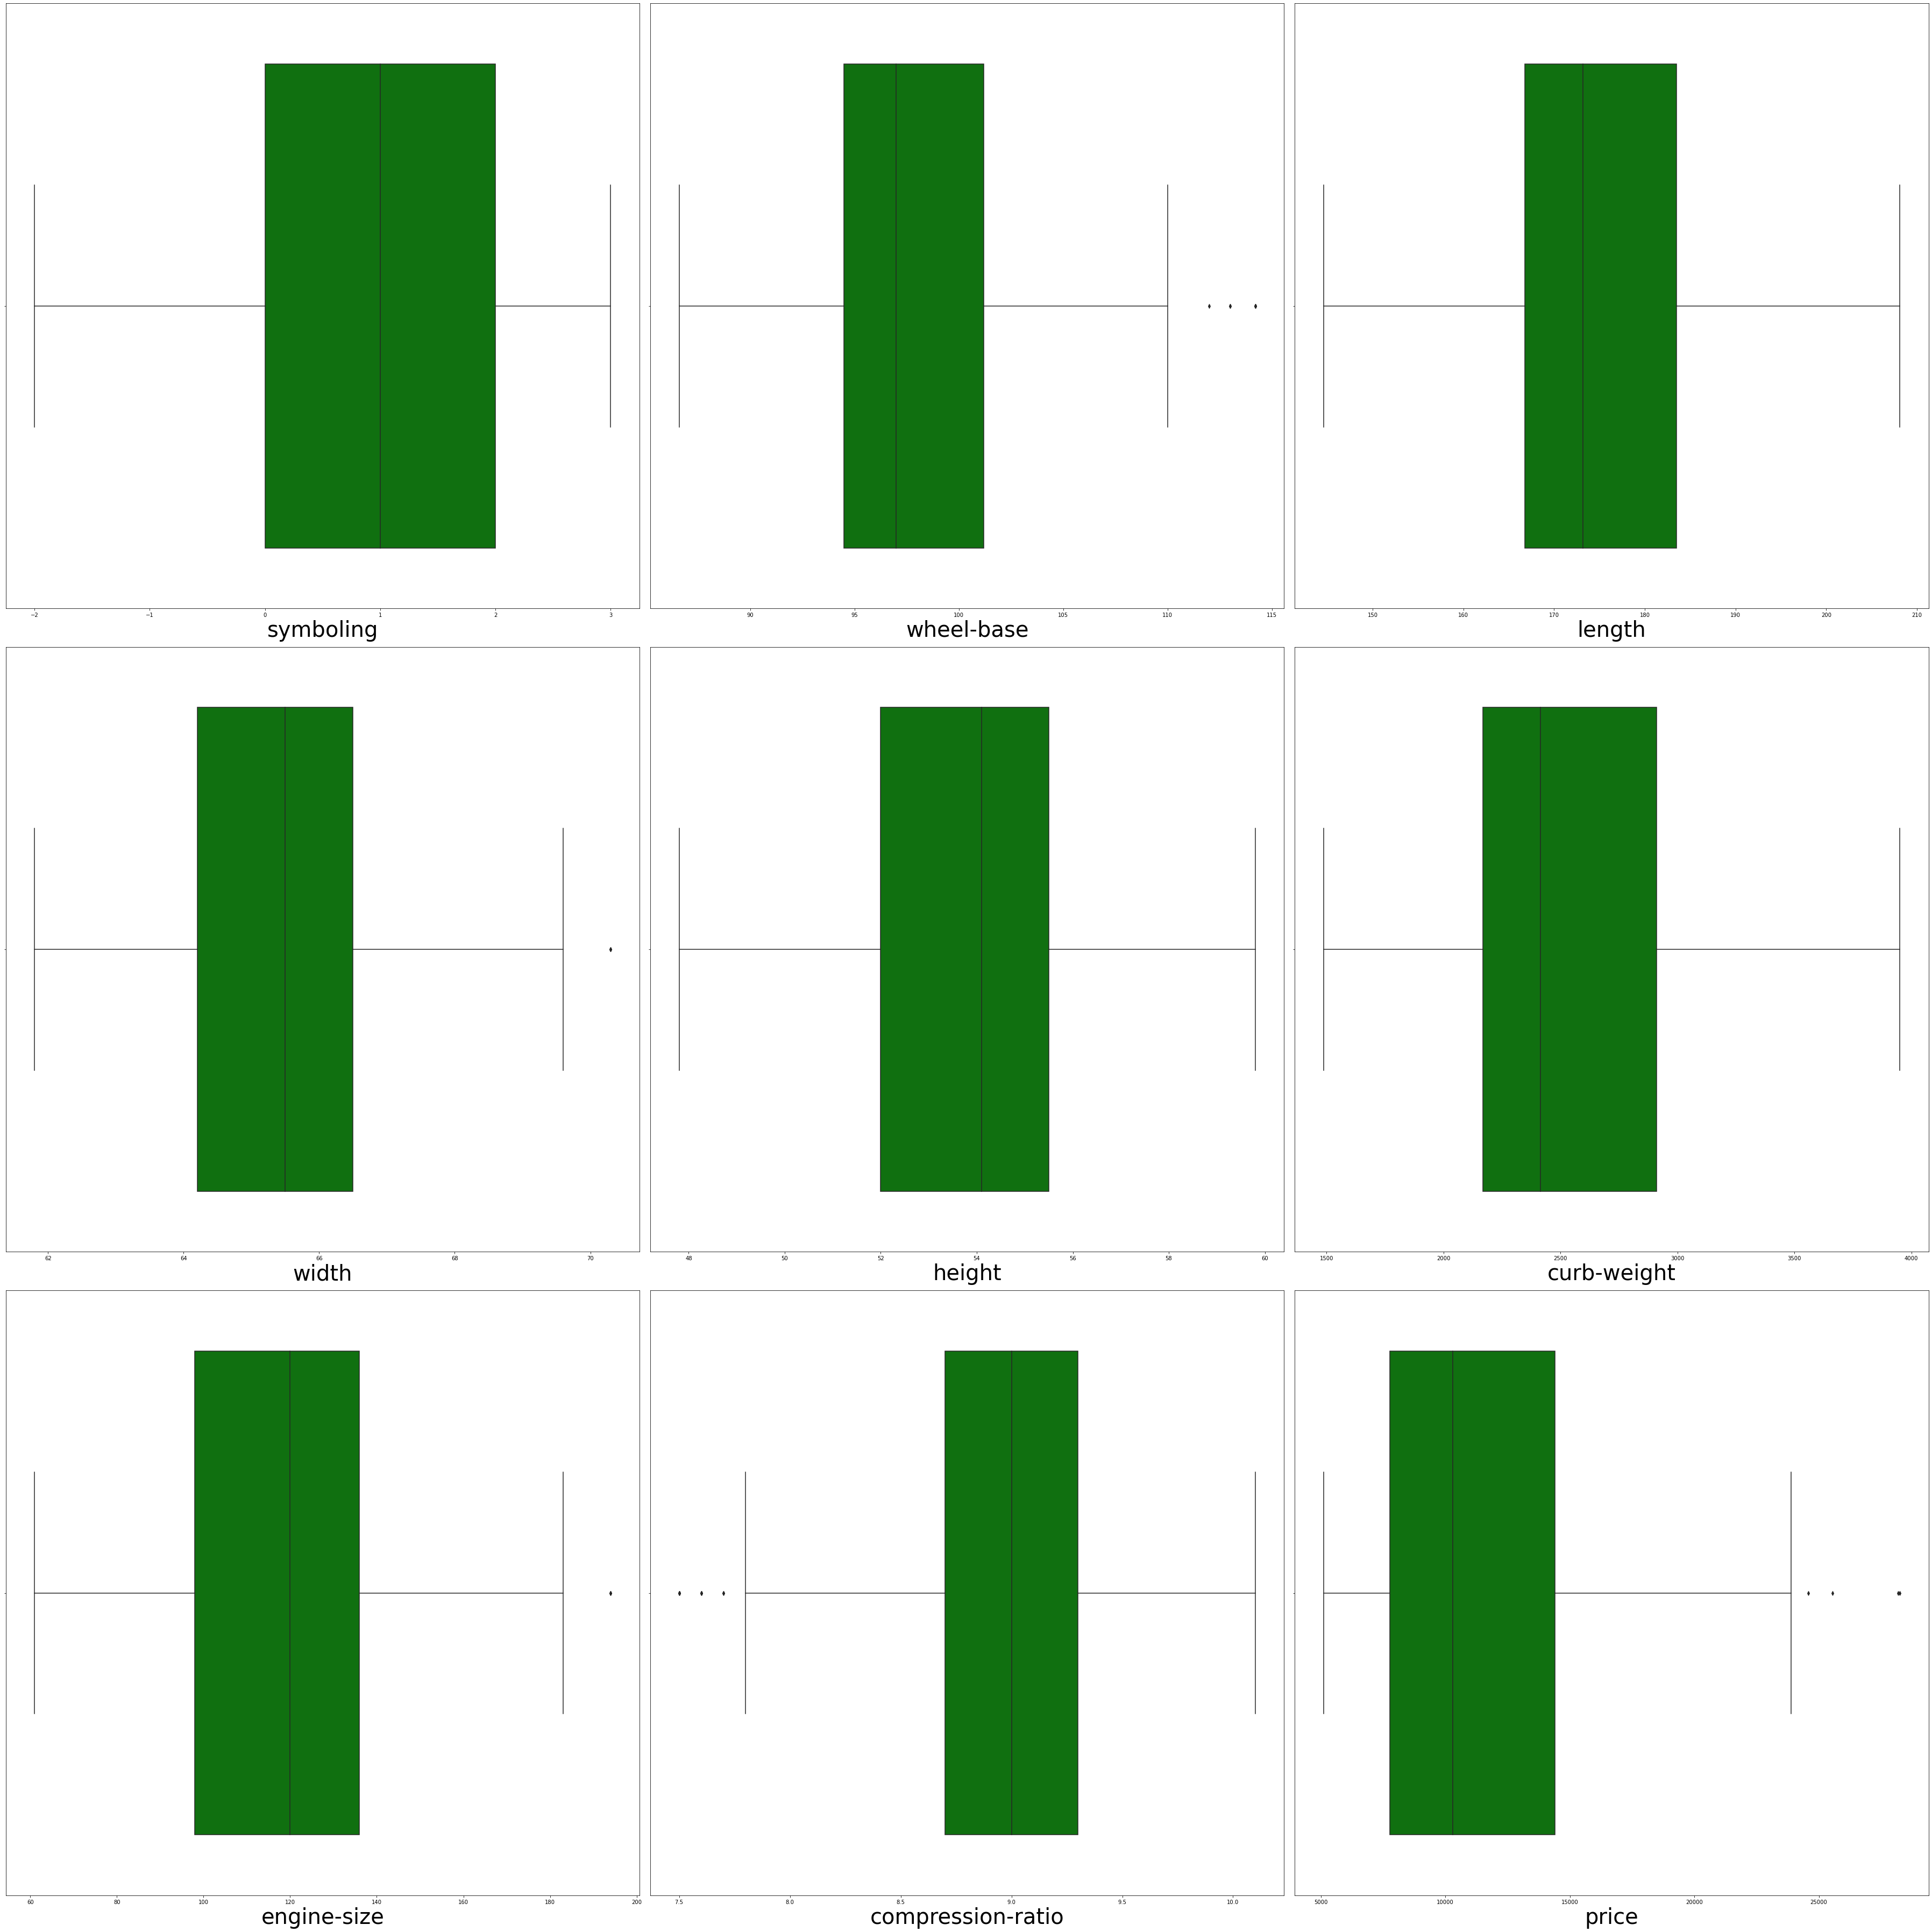

In [1291]:
plt.figure(figsize=(50,50))                  # CHecking is the outliers are get removed or not
data4=data[['symboling',                     
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 
        'engine-size', 
       'compression-ratio', 
        'price']]
plot=1

for column in data4:
    if plot<=9:
        ax=plt.subplot(3,3,plot)
        sns.boxplot(data4[column].dropna(axis=0),color='g')
        plt.xlabel(column,fontsize=40)
    plot+=1
plt.tight_layout()

# Scaling The data

In [1292]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
data5=data[['symboling',                   
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 
        'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'price','fuel-economy']]
ss.fit_transform(data5)

array([[ 1.72504964, -1.7673579 , -0.46082407, ..., -0.24823862,
         0.43250662, -0.60537485],
       [ 1.72504964, -1.7673579 , -0.46082407, ..., -0.24823862,
         1.05856536, -0.60537485],
       [ 0.1271926 , -0.71334245, -0.26193212, ..., -0.24823862,
         1.05856536, -0.84247905],
       ...,
       [-1.47066444,  1.89489919,  1.19660884, ...,  0.79999589,
         2.09713536, -1.1331229 ],
       [-1.47066444,  1.89489919,  1.19660884, ..., -0.66753243,
         2.30234929, -0.18470611],
       [-1.47066444,  1.89489919,  1.19660884, ...,  0.59034899,
         2.33464184, -0.91131575]])

In [1293]:
data.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,price,fuel-economy,turbo,gas,hardtop,hatchback,sedan,wagon,fwd,rwd,l,ohc,ohcf,ohcv,rotor,rear,two,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,13495,23.70,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,16500,23.70,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,16500,22.15,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,13950,26.70,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,17450,19.80,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


# 4. Feature Selection

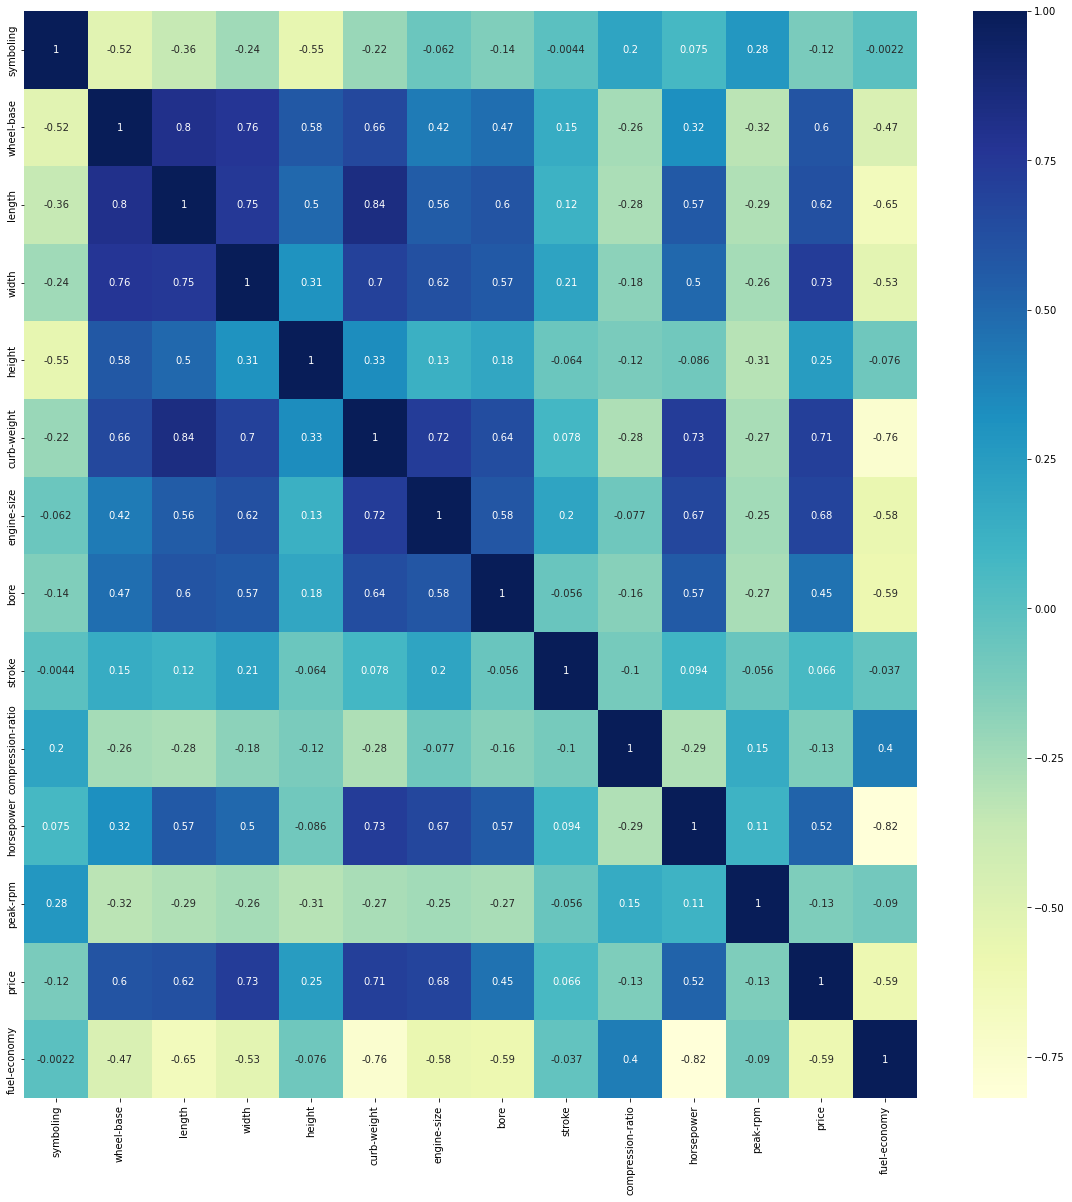

In [1294]:
plt.rcParams['figure.figsize']=(20,20)     #it shows the co-relation between the features and the price
data5=data[['symboling',                     #,so that we take only those feature which highly coreleted with target variable.
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 
        'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'price','fuel-economy']]
sns.heatmap(data5.corr(),annot=True,cmap='YlGnBu',annot_kws={"size":10})
plt.show()

In [1178]:
data.drop(['fuel-economy','compression-ratio'],axis=1,inplace=True)  #Drop the features which are less corealated with price

# Spliting The Data

In [1179]:
x=data.drop('price',axis=1)   #Split the data into target variable and independent variables.
y=data.price

In [1180]:
print(x.shape)
print(y.shape)

(201, 39)
(201,)


In [1181]:
from sklearn.ensemble import ExtraTreesRegressor    
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

<AxesSubplot:>

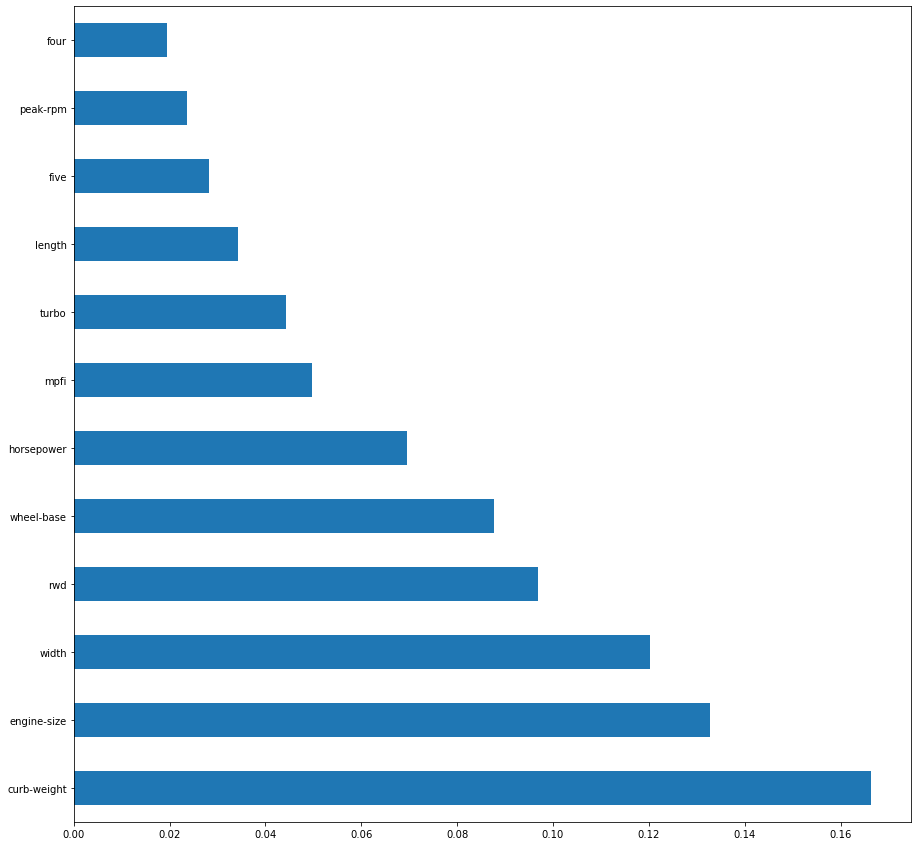

In [1182]:
#plotting the data as per the corelation with the target variable
plt.figure(figsize=(15,15))
(pd.Series(model.feature_importances_, index=x.columns)
   .nlargest(12)
   .plot(kind='barh'))

In [1183]:
x.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,horsepower,peak-rpm,turbo,gas,hardtop,hatchback,sedan,wagon,fwd,rwd,l,ohc,ohcf,ohcv,rotor,rear,two,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111.0,5000.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111.0,5000.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,154.0,5000.0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,102.0,5500.0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,115.0,5500.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [1184]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=12)

In [1185]:
print(x_train.shape)
print(x_test.shape)

(150, 39)
(51, 39)


# 5. Model Creation

## Linear Regression

In [1186]:
from sklearn.linear_model import LinearRegression   #Importing the packages
LR=LinearRegression()

LR.fit(x_train,y_train)  #fit the training data with the model

LinearRegression()

In [1187]:
y_test_pred=LR.predict(x_test)   #predict with test data

In [1188]:
y_train_pred=LR.predict(x_train)   #predict with train data

# Evalutation Metrics

In [1189]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error   #importing all the metrics for evaluation

In [1190]:
r2_score(y_test,y_test_pred)

0.6613596036969464

In [1191]:
r2_score(y_train,y_train_pred)

0.8736752730123805

In [1192]:
print('MSE',mean_squared_error(y_test,y_test_pred))  ## Mean Squared Error 

MSE 7048952.434343491


In [1193]:
print("MAE",mean_absolute_error(y_test,y_test_pred))  # Mean Absolute Error of test data

MAE 2068.912505650934


In [1194]:
mean_absolute_error(y_train,y_train_pred)    # Mean Absolute Error of training data

1253.1013022606867

In [1195]:
# adjusted r2 score
print('adjusted r2 score', 1-(1-0.66)*(150-1)/(150-51-1))


adjusted r2 score 0.48306122448979594


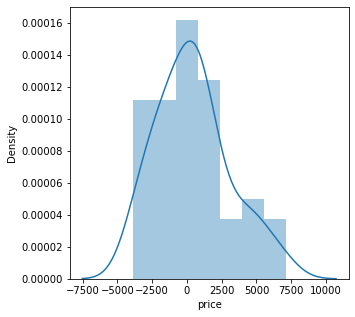

In [1196]:
plt.figure(figsize=(5,5))          #plotting the erroe of test and predict data
sns.distplot(y_test-y_test_pred)
plt.show()

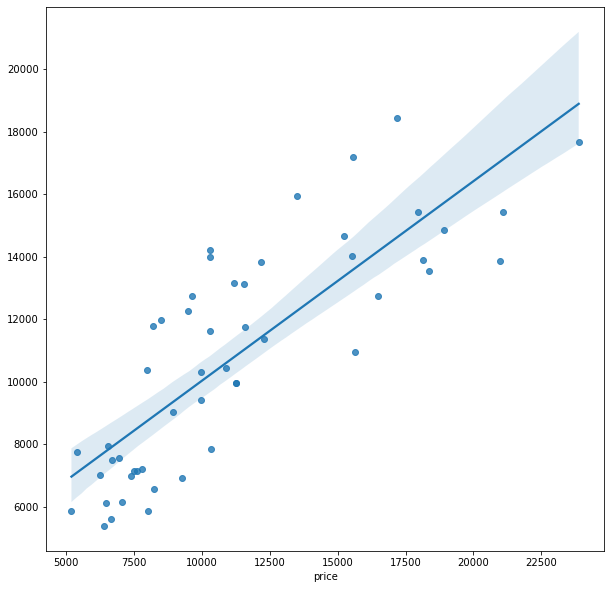

In [1197]:
plt.figure(figsize=(10,10))        #plotting the regression line between test and predict output
sns.regplot(y_test,y_test_pred)
plt.show()

# **Assumptions of Linear Regression**


- Linearity: Linear relationship exist between dependent and independent variable. In case of non-linearity, use transformation such as logarthmic, exponential, square root etc
- No multicollinearity: If there is multicollinearity its unclear which independent variable explains the dependent variable.
- Errors are normally distributed. If not, then confidence interval may become too wide or narrow.

Pros:
- Simple method
- Easy to use and understand

Cons
- Very sensitive to outliers : often leads to model with low accuracy
- It performs well for linearly seperable datasets. So not recommended for most real world applications as it produces simplified results assuming linear relationship between the data.

# Random Forest Tree


In [1198]:
from sklearn.ensemble import RandomForestRegressor   #Imputing random forest regressor on train data
RF=RandomForestRegressor(n_estimators=100,criterion='squared_error',max_depth=10,min_samples_split=5,min_samples_leaf=3)
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=5)

In [1199]:
y_pred=RF.predict(x_test)  #predict using random forest regressor

In [1201]:
print('r2_score:',r2_score(y_test,y_pred))

r2_score: 0.7145708066109514


In [1202]:
print('MAE:', mean_absolute_error(y_test, y_pred))     
print('MSE:', mean_squared_error(y_test, y_pred))     
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 1608.1548333142891
MSE: 5941337.269673786
RMSE: 2437.485850148424


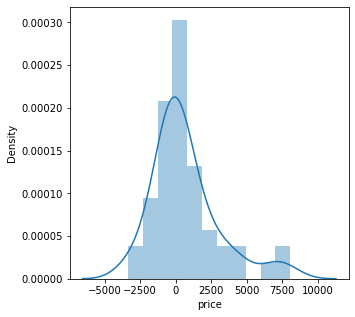

In [1203]:
plt.figure(figsize=(5,5))          #plotting the erroe of test and predict data
sns.distplot(y_test-y_pred)
plt.show()

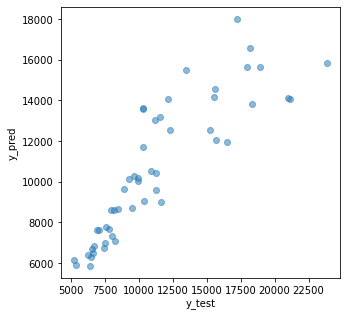

In [1204]:
plt.figure(figsize=(5,5))              #plotting the test output and predicted output
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# **Hyperparameter Tuning**


n_estimators = number of trees in the foreset

max_features =These are the maximum number of features Random Forest is allowed to try in individual tree. There are multiple options available in Python to assign maximum features

max_depth =The depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data

min_samples_split =the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node

min_samples_leaf = minimum number of data points allowed in a leaf node

bootstrap = method for sampling data points (with or without replacement)

In [1205]:
from sklearn.model_selection import RandomizedSearchCV

In [1206]:
params={'n_estimators':[int(X) for X in np.linspace(start=200,stop=2000,num=10)],             #Creating parameters for tuning
       'max_features':['auto','sqrt','log2'],'max_depth':[int(x) for x in np.linspace(10,100,10)],
       'min_samples_split':[2,5,7,9,12],'min_samples_leaf':[1,3,5,9],
       'criterion':["squared_error", "absolute_error", "poisson"],'bootstrap':[True,False]}
rf_randomcv=RandomizedSearchCV(estimator=RF,param_distributions=params,n_iter=100,cv=3,verbose=2,random_state=3,n_jobs=-1)

In [1207]:
rf_randomcv.fit(x_train,y_train)     #Train the model using above parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_depth=10,
                                                   min_samples_leaf=3,
                                                   min_samples_split=5),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 9],
                                        'min_samples_split': [2, 5, 7, 9, 12],
     

In [1208]:
rf_randomcv.best_estimator_        #get the best parameters from tuning

RandomForestRegressor(bootstrap=False, criterion='absolute_error', max_depth=30,
                      max_features='sqrt', min_samples_split=5,
                      n_estimators=200)

In [1209]:
#implementing those parameters on model for best results
RF_tune=RandomForestRegressor(bootstrap=False, criterion='absolute_error', max_depth=30,
                      max_features='sqrt', min_samples_split=5,
                      n_estimators=200)
RF_tune.fit(x_train,y_train)
y_pred_tune=RF_tune.predict(x_test)             #predict using the model

In [1210]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'criterion': 'absolute_error',
 'bootstrap': False}

In [1211]:
print('r2-score',r2_score(y_test,y_pred_tune))

r2-score 0.8341230211380457


In [1212]:
print('MAE:', mean_absolute_error(y_test, y_pred_tune))       #Evaluation the model using different metrics
print('MSE:', mean_squared_error(y_test, y_pred_tune))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_tune)))

MAE: 1310.8916666666664
MSE: 3452804.0562063716
RMSE: 1858.1722353448217


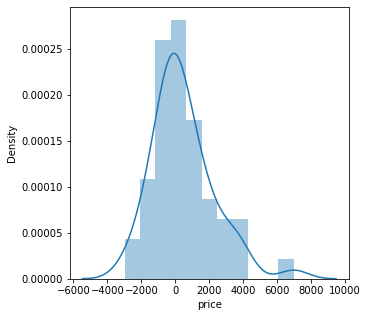

In [1213]:
plt.figure(figsize=(5,5))          #plotting the erroe of test and predict data
sns.distplot(y_test-y_pred_tune)
plt.show()

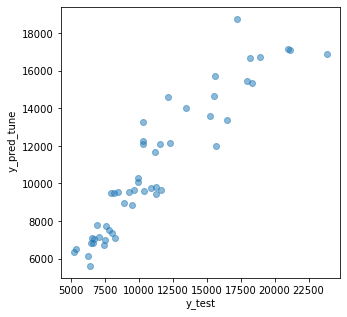

In [1229]:
plt.figure(figsize=(5,5))                 #plotting the test output and predicted output
plt.scatter(y_test,  y_pred_tune, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel(" y_pred_tune")
plt.show()

# Gradient Boosting

In [1215]:
from sklearn.ensemble import GradientBoostingRegressor     #Using Grident Boosting for evaluation
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

GradientBoostingRegressor()

In [1216]:
y_pred_gb=GB.predict(x_test)   #train the model

In [1217]:
r2_score(y_test,y_pred_gb)

0.8393332287851656

In [1218]:
print('MAE:', mean_absolute_error(y_test,y_pred_gb))     
print('MSE:', mean_squared_error(y_test, y_pred_gb))     
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_gb)))

MAE: 1314.4893023052973
MSE: 3344351.236405351
RMSE: 1828.7567460997516


# Hyper parameter tuning for grident boosting

In [1219]:
param={'n_estimators':[int(x) for x in np.linspace(start=100,stop=2000,num=10)],      #Creating parameters for tuning
      'max_depth':[1,3,5,7],'learning_rate':[0.1,0.2,0.3],'alpha':[0.7,0.9,0.5],
      'subsample':[1.0,2.0,3.0],'criterion':['friedman_mse', 'squared_error', 'mse', 'mae'],
       'loss':['squared_error', 'absolute_error', 'huber', 'quantile']}


In [1220]:
#creating the model
GB=GradientBoostingRegressor(random_state=5)
gbh=RandomizedSearchCV(GB,param_distributions=param, cv=3,  
                                random_state=42, n_jobs=-1)

In [1221]:
gbh.fit(x_train,y_train)     #fit the training data into the model

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=5),
                   n_jobs=-1,
                   param_distributions={'alpha': [0.7, 0.9, 0.5],
                                        'criterion': ['friedman_mse',
                                                      'squared_error', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.1, 0.2, 0.3],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [1, 3, 5, 7],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000],
                                        'sub

In [1222]:
gbh.best_params_   # getting best parameter from it

{'subsample': 1.0,
 'n_estimators': 1155,
 'max_depth': 5,
 'loss': 'quantile',
 'learning_rate': 0.3,
 'criterion': 'mse',
 'alpha': 0.5}

In [1223]:
#train the model using the best parameters
GB_tune=GradientBoostingRegressor(subsample=1.0,n_estimators=1155,max_depth=5,loss='quantile',learning_rate=0.3,criterion='mse',alpha=0.5)
GB_tune.fit(x_train,y_train)        

GradientBoostingRegressor(alpha=0.5, criterion='mse', learning_rate=0.3,
                          loss='quantile', max_depth=5, n_estimators=1155)

In [1224]:
y_pred_gb=GB_tune.predict(x_test)   #predict the test data

In [1225]:
r2_score(y_test,y_pred_gb)

0.8380686751927071

In [1226]:
print('MAE:', mean_absolute_error(y_test, y_pred_gb))       #Evaluation the model using different metrics
print('MSE:', mean_squared_error(y_test, y_pred_gb))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_gb)))

MAE: 1323.7713702484052
MSE: 3370673.4892175663
RMSE: 1835.9394023816708


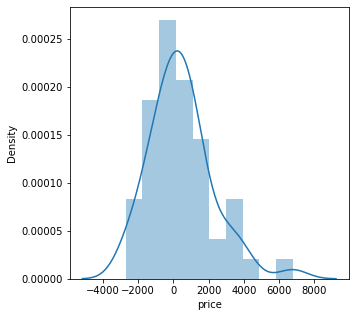

In [1227]:
plt.figure(figsize=(5,5))          #plotting the erroe of test and predict data
sns.distplot(y_test-y_pred_gb)
plt.show()

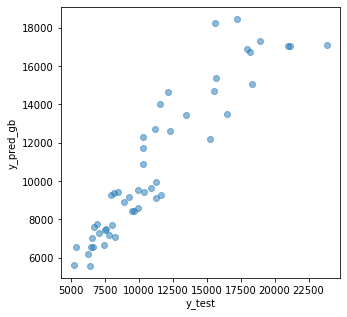

In [1228]:
plt.figure(figsize=(5,5))                 #plotting the test output and predicted output
plt.scatter(y_test,y_pred_gb, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred_gb")
plt.show()

# Conclusion

### I have tried Linear regression, Random forest, Grident boosting and with their hyper parameters for that aswell.
### The Grident boosting gives best r2_score with 83.93 score.


# Thank You.